# Import libraries

In [12]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pacmap

# Plotting Function

In [68]:
def helper_plot_clusters(clust_obj, clust_algo, dimensions = 10, clusters = 4):
    
    # Open dataset of dimensions genes and convert to transposed matrix
    data = "../Data/Variance/most_variable_" + str(dimensions) + ".csv"
    var_genes = pd.read_csv(data, index_col="Unnamed: 0").T

    clust_obj.fit(var_genes)

    # Visualization 2-D
    embedding_2 = pacmap.PaCMAP(n_neighbors=40, random_state=42) 
    pacmap_2_axes = embedding_2.fit_transform(var_genes.values)
    plt.scatter(pacmap_2_axes[:,0], pacmap_2_axes[:,1], c=clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 2-D")
    plt.savefig("../Figures/Assg_3/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_2_dim", bbox_inches="tight")
    plt.show()
    
    # Visualization 3-D
    
    embedding_3 = pacmap.PaCMAP(n_components=3, n_neighbors=40) 
    pacmap_3_axes = embedding_3.fit_transform(var_genes.values, init="pca")
    ax = plt.axes(projection ="3d")
    ax.scatter3D(pacmap_3_axes[:,0], pacmap_3_axes[:,1], pacmap_3_axes[:,2], c = clust_obj.labels_)
    plt.title("Top " + str(dimensions) + " genes within " + str(clusters) + " clusters by " + clust_algo + ", 3-D")
    plt.savefig("../Figures/Assg_3/" + clust_algo + "_top_" + str(dimensions) + "_clusternum_" + str(clusters) + "_3_dim", bbox_inches="tight")
    plt.show()

Declare a wrapper function for the helper plot_clusters which hides the details and permits picking between KMeans and KMedoids clustering

In [69]:
def plot_clusters(clust_algo, dimensions = 10, clusters = 4):
    if (clust_algo == 'KMeans'):
        clust_obj = KMeans(n_clusters=clusters, random_state=0)
    if (clust_algo == 'KMedoids'):
        clust_obj = KMedoids(n_clusters=clusters, method='pam', init='random', random_state=1234)
    helper_plot_clusters(clust_obj, clust_algo, dimensions, clusters)

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


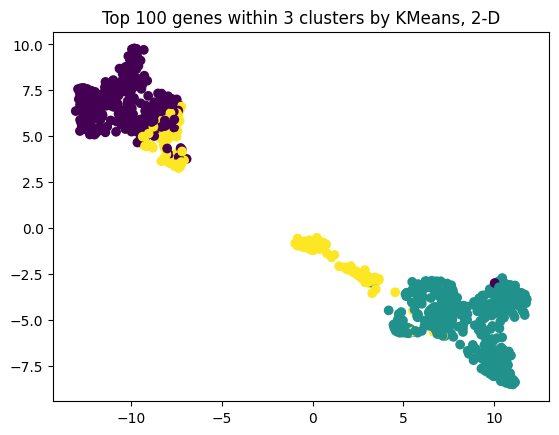

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


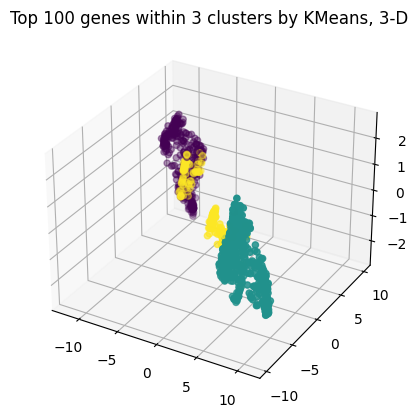

In [70]:
plot_clusters('KMeans', dimensions=100, clusters=3)

# Sample Heatmap

In [ ]:
np.concatenate((patients, patients_labels), axis=1)

In [ ]:
row_colors.values

In [ ]:
variance_genes = pd.read_csv("../Data/Variance/most_variable_10.csv", index_col="Unnamed: 0").T
kmeans = KMeans(n_clusters=3, random_state=0).fit(variance_genes)
series = pd.Series(kmeans.labels_)
lut = dict(zip(series.unique(), "bgy"))
row_colors = series.map(lut)
patients_labels = pd.DataFrame(row_colors.values, variance_genes.index.values)
sns.clustermap(variance_genes.T, col_colors=patients_labels)

# Sample Sankey

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

# PAM Clustering using [scikit Kmedoids](https://scikit-learn-extra.readthedocs.io/en/stable/install.html)

In [43]:
from sklearn_extra.cluster import KMedoids

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


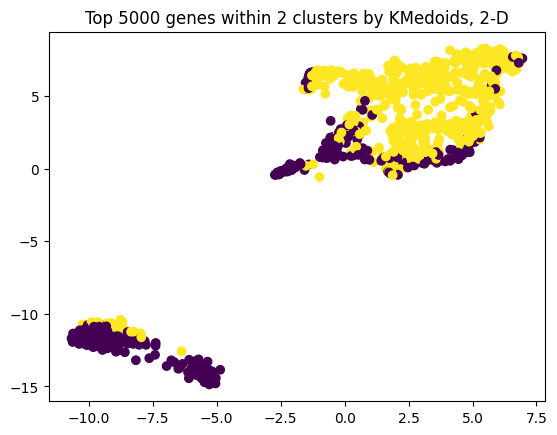

C:\Users\mazhu\AppData\Roaming\Python\Python310\site-packages\pacmap\pacmap.py:778: UserWarning: Warning: random state is removed
  warnings.warn(f'Warning: random state is removed')


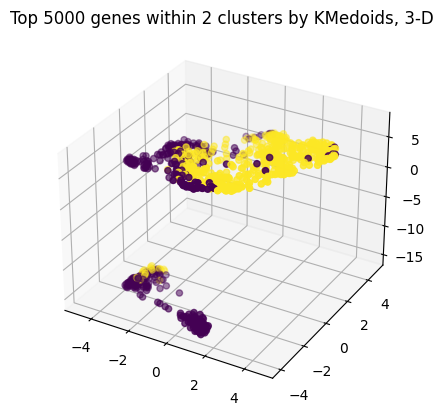

In [72]:
plot_clusters('KMedoids', dimensions = 5000, clusters = 2)